In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Dataset/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print(df.info())
print(df.describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None
<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   

In [4]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
print(df.shape)
print(df.duplicated().sum())

(918, 12)
0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
print(df['Sex'].value_counts())
print(df['ChestPainType'].value_counts())
print(df['RestingECG'].value_counts())
print(df['ExerciseAngina'].value_counts())
print(df['ST_Slope'].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [8]:
### Category and sex are two categorical objects needed to convert to numerical data.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Sex'])
df['ChestPainType']= le.fit_transform(df['ChestPainType'])
df['RestingECG']= le.fit_transform(df['RestingECG'])
df['ExerciseAngina']= le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']= le.fit_transform(df['ST_Slope'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [9]:
corr_metrix = df.corr()
corr_metrix['HeartDisease']*100

Age                28.203851
Sex                30.544492
ChestPainType     -38.682769
RestingBP          10.758898
Cholesterol       -23.274064
FastingBS          26.729119
RestingECG          5.738436
MaxHR             -40.042077
ExerciseAngina     49.428199
Oldpeak            40.395072
ST_Slope          -55.877071
HeartDisease      100.000000
Name: HeartDisease, dtype: float64

<Axes: >

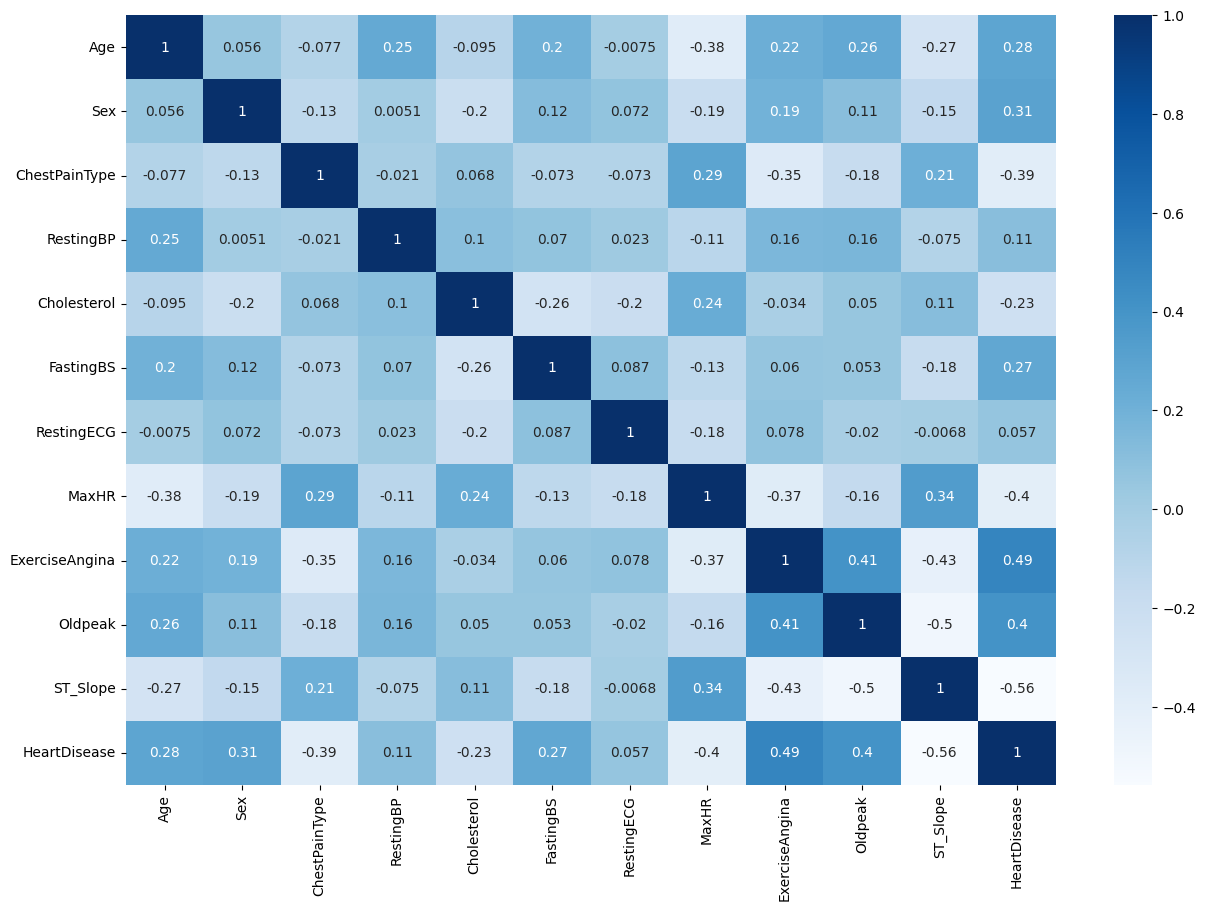

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_metrix, annot=True, cmap='Blues')

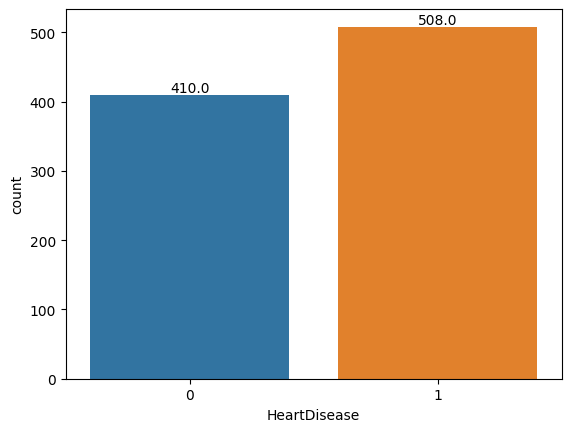

In [11]:
colors = ["#1f77b4", "#ff7f0e"]
ax = sns.countplot(x='HeartDisease', data=df, palette=colors)

# Add count on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Show the plot
plt.show()

In [12]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']
print(X.shape, y.shape)

(918, 11) (918,)


In [13]:
y.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
y_train.value_counts()

HeartDisease
1    404
0    330
Name: count, dtype: int64

In [15]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('Train acc -> ',lr.score(X_train,y_train)*100)
print('Test acc -> ',lr.score(X_test,y_test)*100)

Train acc ->  85.96730245231608
Test acc ->  85.32608695652173


C:\Users\babun\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
### hyperparameter tunning for logistic regression

# penalty = ['l1', 'l2', 'elasticnet']
# C = [1,10,15,20]
# # solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
# # multi_class = ['auto', 'ovr', 'multinomial']

# params = {
#     'penalty' : penalty,
#     'C': C
#     # 'solver': solver,
#     # 'multi_class': multi_class
# }
# from sklearn.model_selection import GridSearchCV
# lr_grid = GridSearchCV(estimator=lr, param_grid=params, cv=5, n_jobs=-1)
# lr_grid.fit(X_train,y_train)

# print('Best Parameters -> ',lr_grid.best_params_)
# print('Best Parameters -> ',lr_grid.best_score_)

In [17]:
# lr_tunning = LogisticRegression(C=15, multi_class='multinomial', penalty='l2', solver='lbfgs')
# lr_tunning.fit(X_train,y_train)

# print('Train acc -> ',lr_tunning.score(X_train,y_train)*100)
# print('Test acc -> ',lr_tunning.score(X_test,y_test)*100)

In [18]:
# y_pred = lr.predict(X_test)
# print(y_pred)
# from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error,mean_squared_error
# cm = confusion_matrix(y_test, y_pred)
# cm


[1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1
 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0
 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0]


array([[66, 14],
       [13, 91]], dtype=int64)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        80
           1       0.87      0.88      0.87       104

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



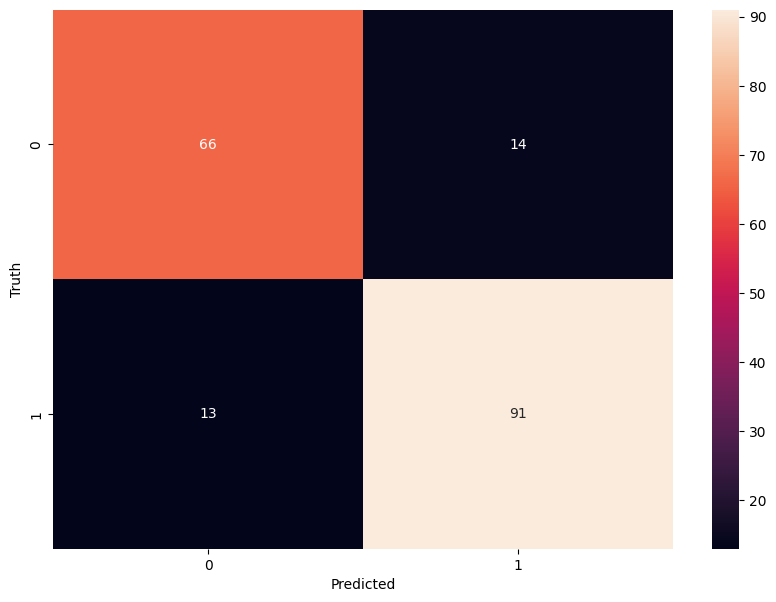

In [19]:
# plt.figure(figsize=(10,7))
# sns.heatmap(cm, annot=True)
# plt.xlabel('Predicted')
# plt.ylabel('Truth')

# print(classification_report(y_test, y_pred))

In [20]:
### support vectior machine
# from sklearn.svm import SVC
# svc = SVC()
# svc.fit(X_train,y_train)

# print('Train acc -> ',svc.score(X_train,y_train)*100)
# print('Test acc -> ',svc.score(X_test,y_test)*100)

Train acc ->  72.88828337874659
Test acc ->  71.19565217391305


In [21]:
### decition tree
# from sklearn import tree
# dt = tree.DecisionTreeClassifier()
# dt.fit(X_train,y_train)

# print('Train acc -> ',dt.score(X_train,y_train)*100)
# print('Test acc -> ',dt.score(X_test,y_test)*100)

Train acc ->  100.0
Test acc ->  79.8913043478261


In [22]:
# ### Random Forest classifier
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# rf.fit(X_train, y_train)

# print('Train acc -> ',rf.score(X_train,y_train)*100)
# print('Test acc -> ',rf.score(X_test,y_test)*100)

Train acc ->  99.86376021798365
Test acc ->  90.76086956521739


In [23]:
### KNN classifier
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(X_train,y_train)

# print('Train acc -> ',knn.score(X_train,y_train)*100)
# print('Test acc -> ',knn.score(X_test,y_test)*100)

Train acc ->  80.92643051771117
Test acc ->  65.21739130434783


In [24]:
# ### Adaboosting
# from sklearn.ensemble import AdaBoostClassifier
# abc = AdaBoostClassifier()
# abc.fit(X_train,y_train)

# print('Train acc -> ',abc.score(X_train,y_train)*100)
# print('Test acc -> ',abc.score(X_test,y_test)*100)

Train acc ->  88.69209809264305
Test acc ->  85.86956521739131


In [25]:
# y_pred_abc = abc.predict(X_test)
# print(y_pred_abc)
# from sklearn.metrics import confusion_matrix, classification_report,mean_absolute_error,mean_squared_error
# cm_abc = confusion_matrix(y_test, y_pred_abc)
# cm_abc

[1 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1
 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1
 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0]


array([[67, 13],
       [13, 91]], dtype=int64)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        80
           1       0.88      0.88      0.88       104

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



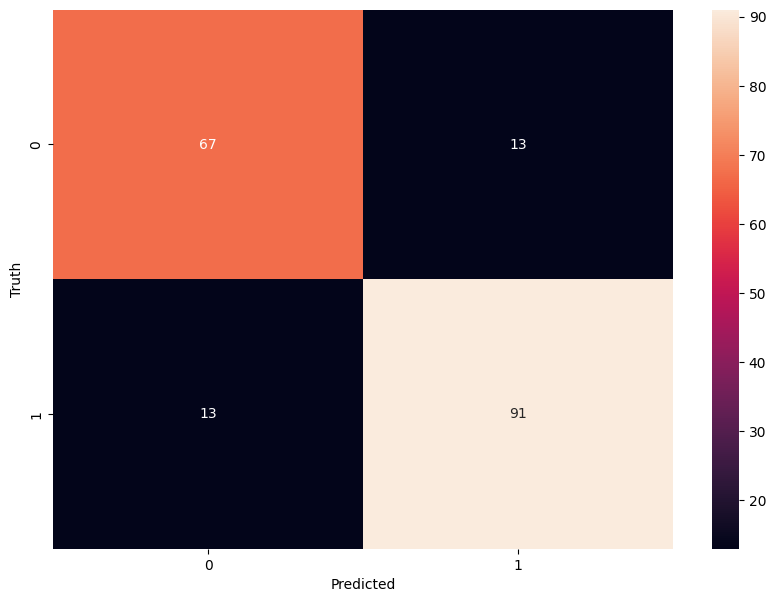

In [26]:
# plt.figure(figsize=(10,7))
# sns.heatmap(cm_abc, annot=True)

# plt.xlabel('Predicted')
# plt.ylabel('Truth')

# print(classification_report(y_test, y_pred_abc))

In [27]:
### hyperparameter tunning for adaboosting


In [28]:
### Gradient Boosting Classifier
# from sklearn.ensemble import GradientBoostingClassifier
# gbc = GradientBoostingClassifier()
# gbc.fit(X_train,y_train)


# print('Train acc -> ',gbc.score(X_train,y_train)*100)
# print('Test acc -> ',gbc.score(X_test,y_test)*100)

Train acc ->  95.36784741144415
Test acc ->  88.58695652173914


In [29]:
### Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(X_train,y_train)

# print('Train acc -> ',nb.score(X_train,y_train)*100)
# print('Test acc -> ',nb.score(X_test,y_test)*100)

Train acc ->  85.55858310626702
Test acc ->  85.86956521739131
